# Spreading of diseases

Our aim with this section is to show in detail how one can apply mathematics and programming to investigate spreading of diseases. The mathematical model is now a system of three differential equations with three unknown functions. To derive such a model, we can use mainly intuition, so no specific background knowledge of diseases is required.

# Spreading of a flu using Forward Euler Method

Problem. Imagine a boarding school out in the country side. This school is a small and closed society. Suddenly, one or more of the pupils get a flu. We expect that the flu may spread quite effectively or die out. The question is how many of the pupils and the school's staff will be affected. Some quite simple mathematics can help us to achieve insight into the dynamics of how the disease spreads.<br>

Let the mathematical function $S(t)$ count how many individuals, at time $t$, that have the possibility to get infected.<br>
Here, $t$ may count hours or days, for instance. These individuals make up a category called susceptibles, labeled as $S$.<br> 

Another category, $I$, consists of the individuals that are infected. Let $I(t)$ count how many there are in category $I$ at time $t$. An individual having recovered from the disease is assumed to gain immunity. There is also a small possibility that an infected will die. <br>In either case, the individual is moved from the $I$ category to a category we call the removed category, labeled with $R$. We let $R(t)$ count the number of individuals in the $R$ category at time $t$. Those who enter the $R$ category, cannot leave this category.

(SIR) To summarize, the spreading of this disease is essentially the dynamics of moving individuals from the S to the I and then to the R category:


http://hplgit.github.io/Programming-for-Computations/pub/p4c/._p4c-solarized-Python021.html

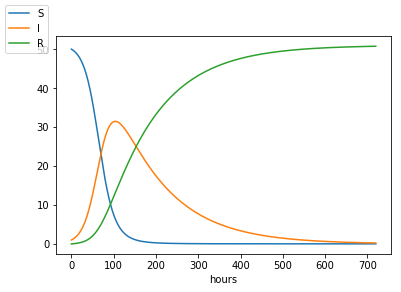

<Figure size 432x288 with 0 Axes>

In [3]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt

# Time unit: 1 h
beta = 10./(40*8*24)
gamma = 3./(15*24)
dt = 0.1             # 6 min
D = 30               # Simulate for D days
N_t = int(D*24/dt)   # Corresponding no of hours

t = linspace(0, N_t*dt, N_t+1)
S = zeros(N_t+1)
I = zeros(N_t+1)
R = zeros(N_t+1)

# Initial condition
S[0] = 50
I[0] = 1
R[0] = 0

# Step equations forward in time
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]

fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'upper left')
plt.xlabel('hours')
plt.show()
plt.savefig('tmp.pdf'); plt.savefig('tmp.png')

## The SIR epidemic model

Mathematical function 

$\textbf{S(t)}$ = how many individuals, at time $t$, that have the possibility to get infected where $t$ may count in hours/days. 

These individuals make category called $\textbf{susceptibles}$, labelled as $S$.

$\textbf{I(t)}$ = count how many there are that are infected.

These individuals make category called  $\textbf{infected}$, labelled as $I$ at time $t$.

An individual having recovered from the disease is assumed to gain immunity. There is also a small possibility that an infected will die. In either case, the individual is moved from the $I$ category to a category we call the $\textbf{removed category}$, labeled with $R$.

$\textbf{R(t)}$ = count the number of individuals in the $R$ category at time $t$. Those who enter the $R$ category, cannot leave this category.

$\Delta t$ =  changes that take place during a small time interval



$\textbf{S}$ $\rightarrow$ $\textbf{I}$ $\rightarrow$ $\textbf{R}$

 The SIR model describes the change in the population of each of these compartments in terms of two parameters, $β$ and $γ$.
 
 $β$ describes the effective contact rate of the disease: an infected individual comes into contact with $βN$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $\frac{S}{N}$. 
 
 $γ$ is the mean recovery rate: that is, $\frac{1}{γ}$ is the mean period of time during which an infected individual can pass it on.

$\frac{dS}{dt}$ = - $ \frac{βSI}{N}$ ,

$\frac{dI}{dt} = \frac{βSI}{N}− γI $ ,

$\frac{dR}{dt} = γI. $

The following Python code integrates these equations for a disease characterised by parameters $β=0.2$, $\frac{1}{γ}$ = 10 days in a population of $N $ = 1000 (perhaps 'flu in a school). The model is started with a single infected individual on day 0: $I(0)$ = 1. The plotted curves of $ S(t)$ , $ I(t) $ and $ R(t)$ are styled to look a bit nicer than Matplotlib's defaults.

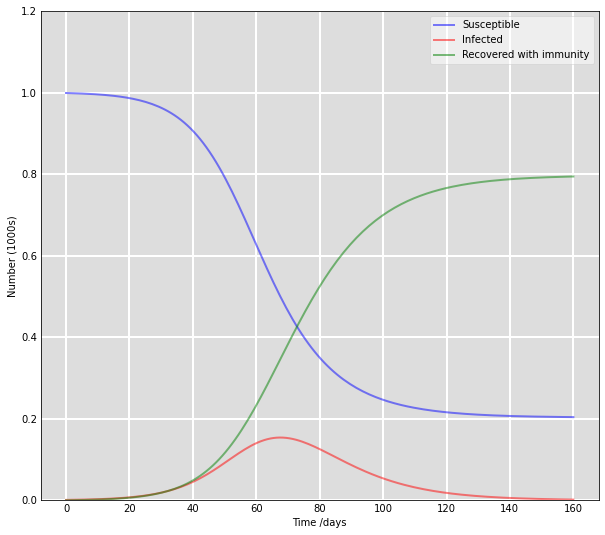

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(10,9),facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

plt.show()

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 10000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 1./20 
# A grid of time points (in days)
t = np.linspace(0, 1600, 1600)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
print(ret.T)

[[ 9.99900000e+03  9.99836816e+03  9.99737711e+03 ...  4.54160054e-01
   4.54160054e-01  4.54160054e-01]
 [ 1.00000000e+00  1.56865218e+00  2.46057149e+00 ... -1.08969830e-12
  -1.08768396e-12 -1.08566962e-12]
 [ 0.00000000e+00  6.31928156e-02  1.62318392e-01 ...  9.99954584e+03
   9.99954584e+03  9.99954584e+03]]
